In [6]:
import igraph
from igraph import Graph, EdgeSeq, plot
import plotly.graph_objects as go

In [7]:
nr_vertices = 5
v_label = list(map(str, range(nr_vertices)))
print(v_label)
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
print(G)
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges
print(E)
L = len(position)
Xn = [position[k][0] for k in range(L)]
print(f"xn: {Xn}")
Yn = [2*M-position[k][1] for k in range(L)]
print(f"yn: {Yn}")
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

['0', '1', '2', '3', '4']
IGRAPH U--- 5 4 --
+ edges:
0--1 0--2 1--3 1--4
[(0, 1), (0, 2), (1, 3), (1, 4)]
xn: [-1.0, 0.0, -1.0, 0.0, 1.0]
yn: [3.0, 4.0, 2.0, 3.0, 3.0]


In [8]:
nr_vertices = 5
v_label = list(map(str, range(nr_vertices)))
print(v_label)
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
plot(G)
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges
print(E)
L = len(position)
Xn = [position[k][0] for k in range(L)]
print(f"xn: {Xn}")
Yn = [2*M-position[k][1] for k in range(L)]
print(f"yn: {Yn}")
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

['0', '1', '2', '3', '4']
[(0, 1), (0, 2), (1, 3), (1, 4)]
xn: [-1.0, 0.0, -1.0, 0.0, 1.0]
yn: [3.0, 4.0, 2.0, 3.0, 3.0]


In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

In [10]:
from igraph import Graph

def build_igraph_from_tree(root):
    g = Graph(directed=True)
    name_to_index = {}

    def dfs(node):
        idx = g.vcount()
        g.add_vertex(name=node.name)
        name_to_index[node] = idx

        for child in node.children:
            child_idx = dfs(child)
            g.add_edge(idx, child_idx)
        return idx

    dfs(root)
    return g

In [11]:
def get_tree_layout(g):
    layout = g.layout_reingold_tilford(mode="in", root=0)
    return layout

In [12]:
import plotly.graph_objects as go

def plot_tree_graph(g, layout):
    Xn = [coord[0] for coord in layout]
    Yn = [-coord[1] for coord in layout]  # invertimos Y para que el árbol crezca hacia abajo

    Xe = []
    Ye = []
    for e in g.es:
        Xe += [Xn[e.source], Xn[e.target], None]
        Ye += [Yn[e.source], Yn[e.target], None]

    edge_trace = go.Scatter(
        x=Xe, y=Ye,
        mode='lines',
        line=dict(color='black', width=1),
        hoverinfo='none'
    )

    node_trace = go.Scatter(
        x=Xn, y=Yn,
        mode='markers+text',
        marker=dict(symbol='circle-dot', size=20, color='lightblue', line=dict(color='blue', width=2)),
        text=[v['name'] for v in g.vs],
        textposition='top center',
        hoverinfo='text'
    )

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='Árbol con igraph + plotly',
                        title_x=0.5,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20, l=5, r=5, t=40),
                        xaxis=dict(showline=False, zeroline=False, showgrid=False),
                        yaxis=dict(showline=False, zeroline=False, showgrid=False)
                    ))

    fig.show()


In [13]:
class Node:
    def __init__(self, name):
        self.name = name
        self.children = []

    def add_child(self, child):
        self.children.append(child)


In [14]:
# Construimos el árbol
root = Node("A")
b = Node("B")
c = Node("C")
d = Node("D")
e = Node("E")
f = Node("F")

root.add_child(b)
root.add_child(c)
b.add_child(d)
b.add_child(e)
c.add_child(f)

# Convertimos y visualizamos
g = build_igraph_from_tree(root)
layout = get_tree_layout(g)
plot_tree_graph(g, layout)


TypeError: conversion to vertex sequence failed

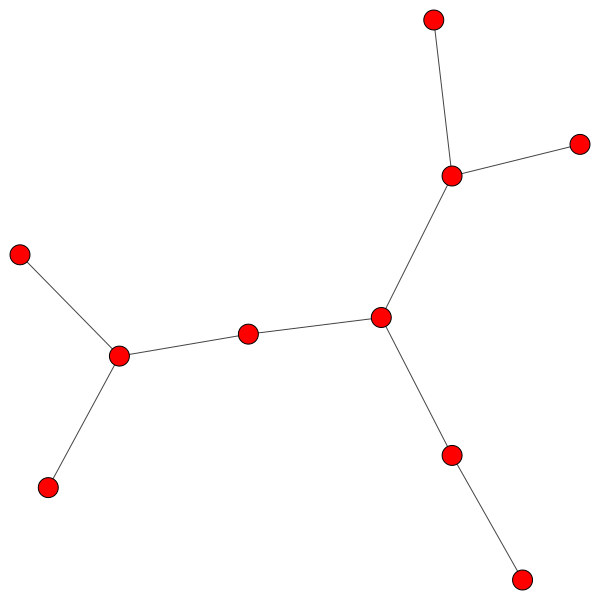

In [ ]:
from igraph import Graph, plot

G = Graph.Tree(10, 2)
plot(G)

In [ ]:
def dibujar_grafo_plotly(grafo, labels):
    # Encontrar raíz: nodo sin padres (grado de entrada 0)
    raices = [v.index for v in grafo.vs if grafo.degree(v, mode="in") == 0]
    if len(raices) != 1:
        raise ValueError(f"Se esperaba 1 raíz, pero hay {len(raices)}")
    root_idx = raices[0]

    layout = grafo.layout_reingold_tilford(mode="in", root=[root_idx])  # <-- raíz como lista

    Xn = [pos[0] for pos in layout]
    Yn = [-pos[1] for pos in layout]  # invertir eje Y para que raíz quede arriba

    Xe, Ye = [], []
    for edge in grafo.get_edgelist():
        Xe += [Xn[edge[0]], Xn[edge[1]], None]
        Ye += [Yn[edge[0]], Yn[edge[1]], None]

    trace_edges = go.Scatter(
        x=Xe, y=Ye,
        mode='lines',
        line=dict(width=1, color='gray'),
        hoverinfo='none'
    )

    trace_nodes = go.Scatter(
        x=Xn, y=Yn,
        mode='markers+text',
        marker=dict(symbol='circle-dot', size=30, color='lightblue', line=dict(width=2)),
        text=labels,
        textposition="top center",
        hoverinfo='text'
    )

    fig = go.Figure(data=[trace_edges, trace_nodes],
                    layout=go.Layout(title='Árbol de búsqueda',
                                     showlegend=False,
                                     margin=dict(b=20, l=5, r=5, t=40),
                                     xaxis=dict(showgrid=False, zeroline=False),
                                     yaxis=dict(showgrid=False, zeroline=False)))
    fig.show()